<a href="https://colab.research.google.com/github/ishtikas06/Corizo-Major-Project/blob/main/corizo_minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.utils import plot_model

In [27]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Minor Project Dataset (Stock Price Prediction).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [28]:
# Calculate the percentage of missing values in each column
Missing_values = df.isnull().sum() / len(df) * 100
# Print the percentage of missing values for each column
print(Missing_values)

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64


<Axes: >

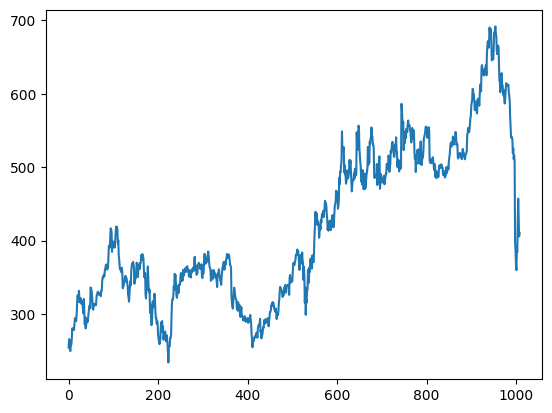

In [29]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

In [ ]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [30]:
# Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.061253,0.038304,0.041331,0.186150
1,0.030059,0.035640,0.030273,0.198264
2,0.071243,0.048408,0.072770,0.135690
3,0.072334,0.037683,0.041265,0.141320
4,0.043474,0.011436,0.010729,0.272902


In [31]:
# Splitting to Training set and Test set
timesplit = TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [32]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


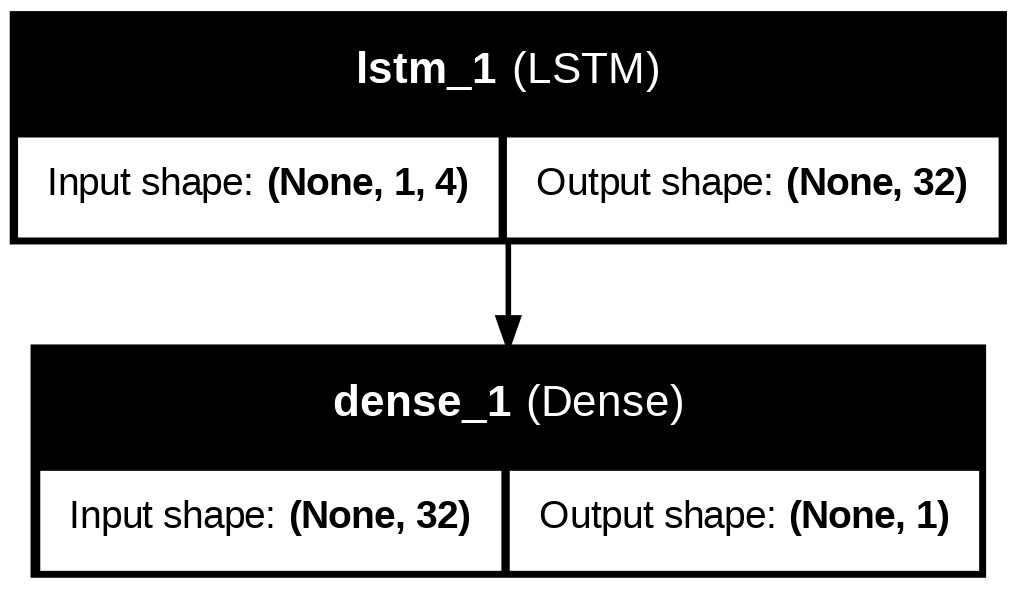

In [33]:
# Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [38]:
lstm.fit(X_train, y_train, epochs=200, batch_size=16)

Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 171950.3125
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 169326.0469
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 169706.0156
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 167968.9219
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 167225.9688
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 167947.7344
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 162465.1094
Epoch 8/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 161544.7344
Epoch 9/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 155657.8594
Epoch 10/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 153824.7812
Epoch 11/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 149938.2656
Epoch 12/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 146451.9219
Epoch 13/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 140783.4531
Epoch 14/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 132926.4688
E

In [39]:
# LSTM Prediction
y_pred = lstm.predict(X_test)
y_pred = y_pred.flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [40]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [41]:
# Print accuracy metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared Score (R²): {r2:.4f}')

Mean Squared Error (MSE): 107.7042
Root Mean Squared Error (RMSE): 10.3781
Mean Absolute Error (MAE): 7.0703
R-squared Score (R²): 0.9848


In [42]:
accuracy_percentage = r2 * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 98.48%


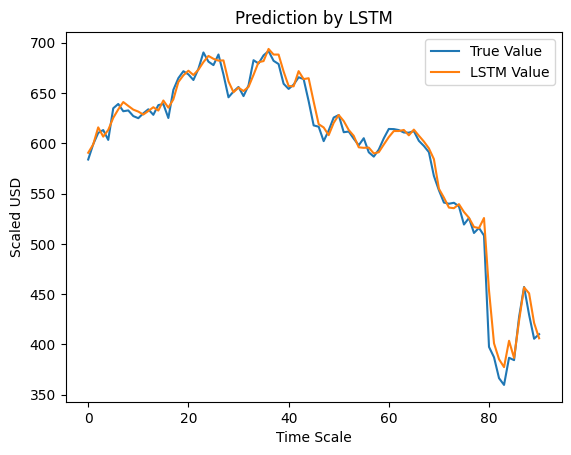

In [43]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()